**LOGISTIC REGRESSION**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Titanic_train.csv to Titanic_train.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['Titanic_train.csv']))

In [7]:
titanic_data=pd.read_csv('Titanic_train.csv')

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [10]:
titanic_data.shape

(891, 12)

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
titanic_data['Embarked'].mode()  #first fill missing values of embarked

,Embarked
0,S


In [14]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [15]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)  # filling missing value for 'Age'

In [16]:
titanic_data.drop(columns='Cabin',inplace =True)  # cabin colum is not needed so drop it

In [17]:
titanic_data.isnull().sum() #check for  nan values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# Creating a new feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [19]:
# dividing 'Sex' colum as per 'Age' .age<15 are child age> are( male/ female)
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [20]:
titanic_data[titanic_data.Age<=15].shape

(83, 13)

In [21]:
titanic_data[titanic_data.Age<=15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [22]:
titanic_data[titanic_data.Age>15].shape

(808, 13)

In [23]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [24]:
# converting categorical data of into numerical  (One Hot Encoding)
titanic_data1=pd.get_dummies(titanic_data,columns=['GenderClass','Embarked'],drop_first=True,dtype='int')

In [25]:
titanic_data1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1


In [26]:
titanic=titanic_data1.drop(columns=['Name','Ticket','Sex','SibSp','Parch'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


***VISUALIZATION***

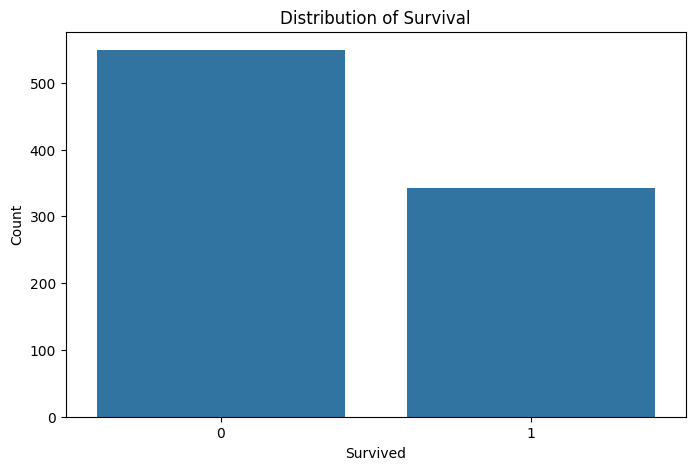

In [27]:
# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

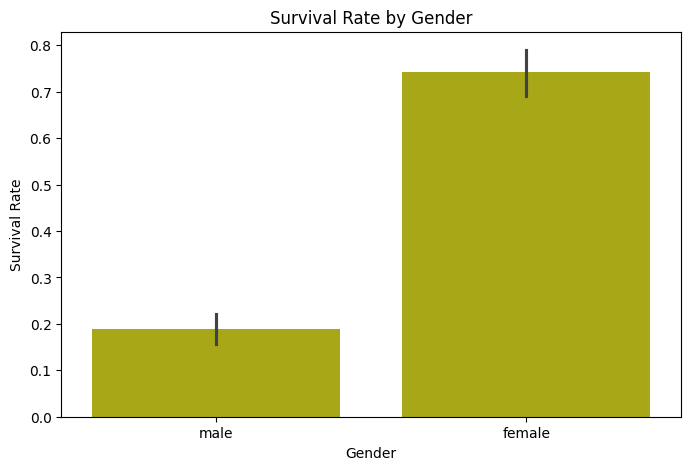

In [29]:
# Survival by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived',color='y', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

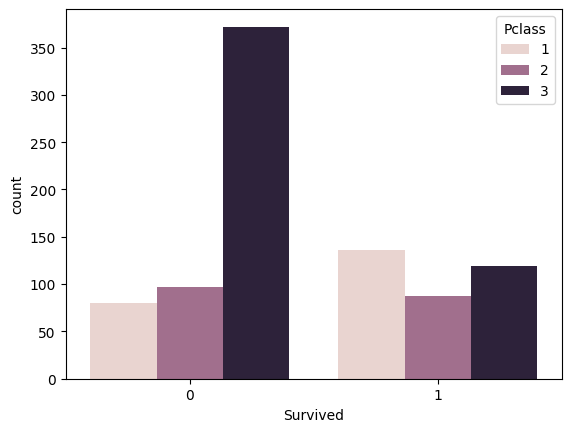

In [30]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

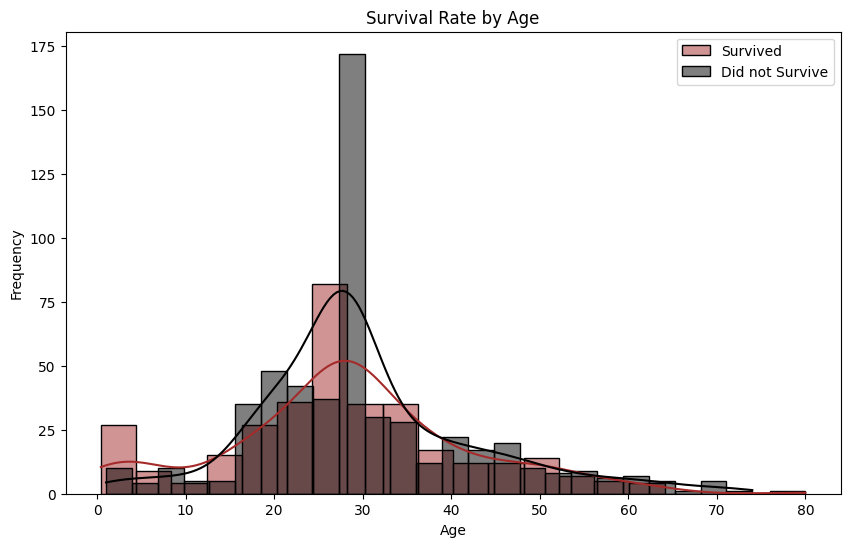

In [32]:
# HISTOGRAM
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], kde=True, color='brown', label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], kde=True, color='black'  , label='Did not Survive')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

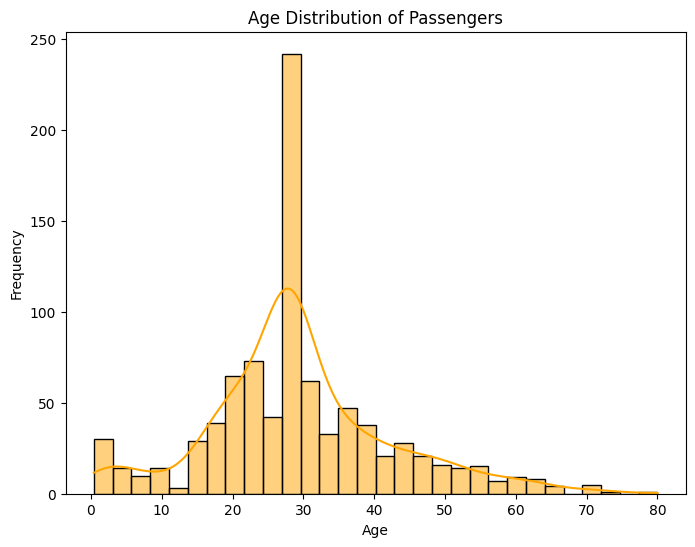

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], kde=True, color='orange')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

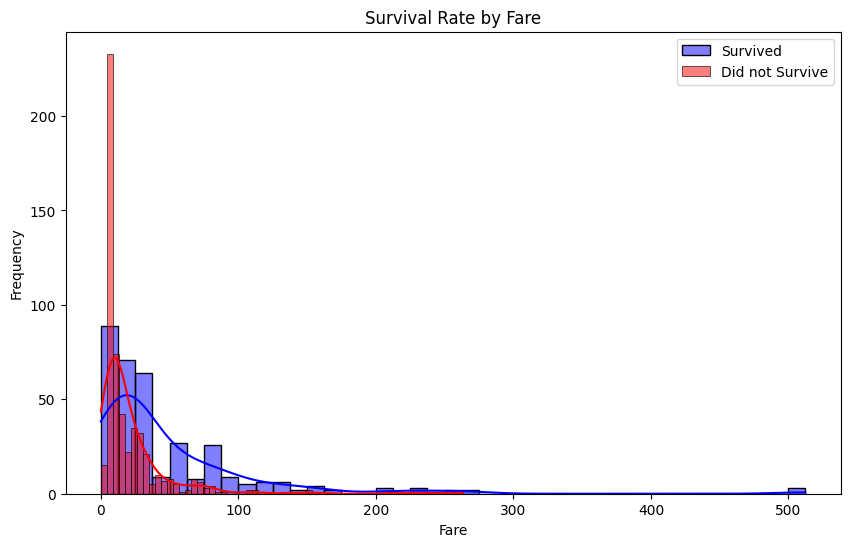

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Fare'], kde=True, color='blue', label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Fare'], kde=True, color='red', label='Did not Survive')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

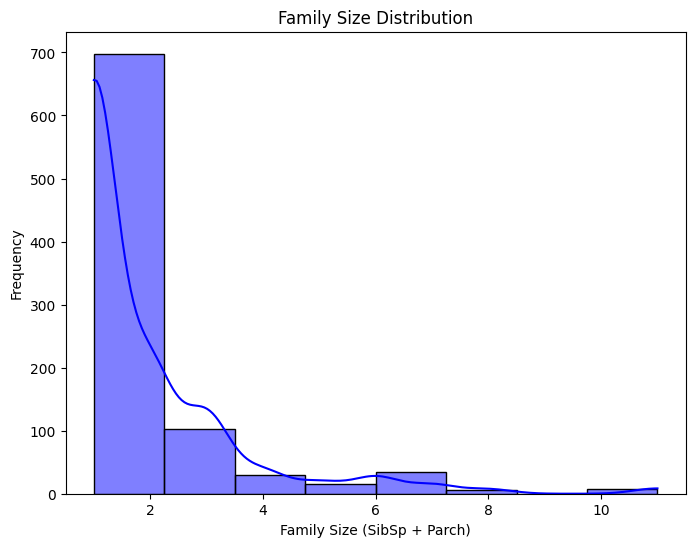

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['FamilySize'], kde= True, bins=8, color='blue')
plt.title('Family Size Distribution')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

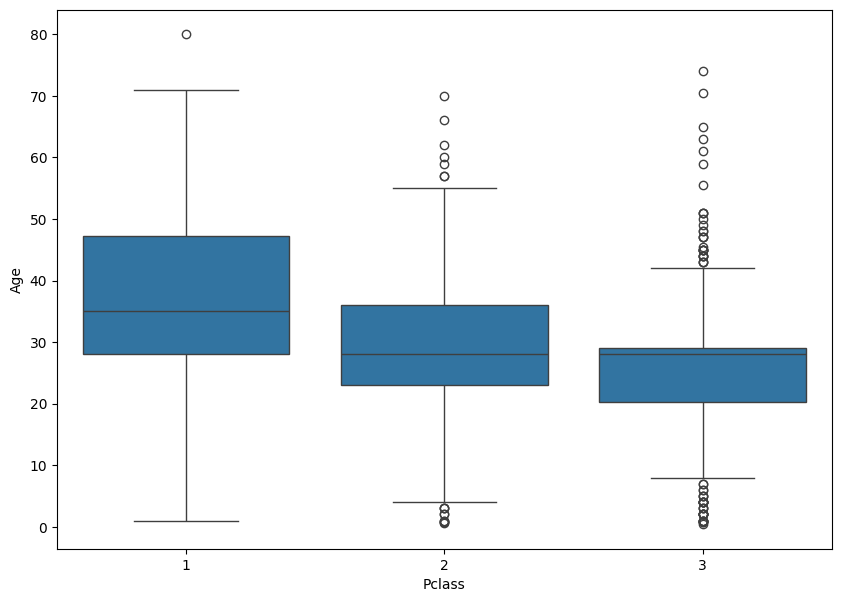

In [38]:
# BOX PLOT
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

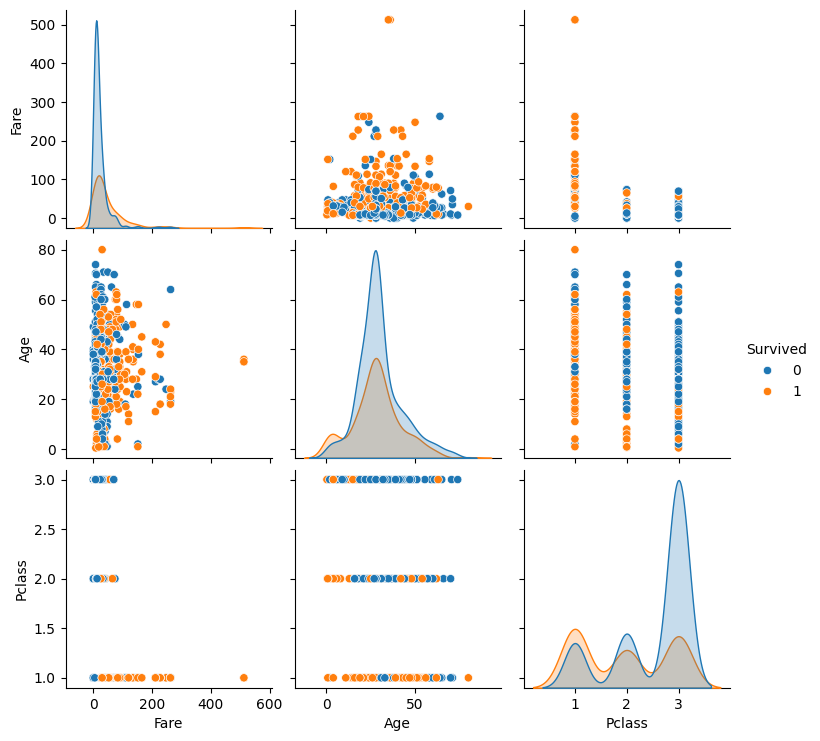

In [39]:
# PAIR PLOT
#  Drawaing Pair Plot to know relation betn fare,age,pclass ,survived
sns.pairplot(titanic_data[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'],hue='Survived',dropna=True)

***Coorelation between all features using HeatMap***

Text(0.5, 1.0, 'Correlation between features')

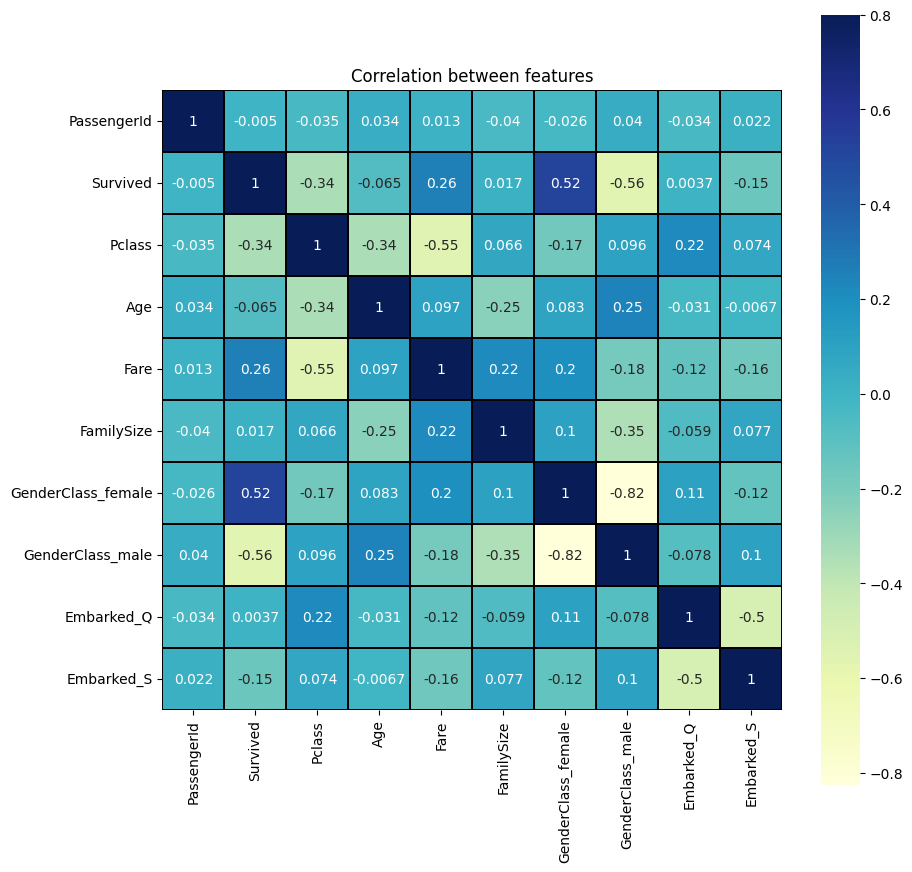

In [40]:
# Establioshing Coorelation between all features using Heatmap
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [ ]:
# LOGISTIC REGRESSION

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [42]:
target=titanic['Survived']

In [43]:
features=titanic.drop(columns='Survived')
features.head(3)

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1


In [44]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=100,train_size=0.75)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 9)
(223, 9)
(668,)
(223,)


In [46]:
log_reg=LogisticRegression()

In [47]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred=log_reg.predict(x_test)

In [49]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1])

In [50]:
accuracy_score(y_test,y_pred)

0.7713004484304933

In [51]:
log_reg.coef_

array([[ 2.88729125e-04, -6.33790582e-01, -1.82414059e-02,
         9.31296433e-03, -2.98669997e-01,  1.24890463e+00,
        -1.94751818e+00, -4.27289302e-01,  5.37929511e-01]])

Our model is 78% accurate using Logistic Regression model

In [52]:
# Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
conf=confusion_matrix(y_test,y_pred)
print(conf)

[[113  14]
 [ 37  59]]


Text(0.5, 1.0, 'Confusion_Matrix')

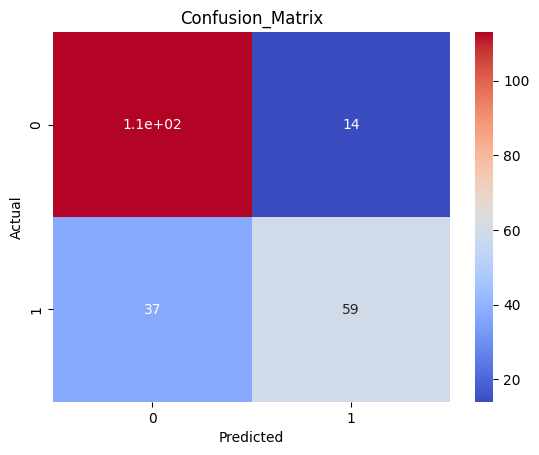

In [55]:
  # check confusion matrix using heatmap
sns.heatmap(conf,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion_Matrix')

In [56]:
# lets create a datframe of confusion matrix
df=pd.DataFrame(conf)

In [57]:
df.index = ['Actual Died','Actual Survived']
df.columns = ['Predicted Died','Predicted Survived']
print(df)

                 Predicted Died  Predicted Survived
Actual Died                 113                  14
Actual Survived              37                  59


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       127
           1       0.81      0.61      0.70        96

    accuracy                           0.77       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.77      0.77       223



***ROC Curve***

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve

In [60]:
logistic_probability=log_reg.predict_log_proba(x_test)[:,1]
logistic_probability

array([-0.70507183, -0.60810266, -2.09835653, -0.22938559, -1.71756191,
       -0.45926959, -2.49392217, -1.1980401 , -0.03368972, -0.6923613 ,
       -0.01393847, -2.15702294, -1.92325682, -0.48351794, -1.30056627,
       -2.58349984, -0.15837292, -1.16363812, -0.46208794, -2.11836719,
       -2.17676991, -0.05713314, -2.08907356, -0.26830222, -2.26667249,
       -2.19856548, -0.28031873, -1.7203746 , -2.35987734, -3.04892577,
       -4.59456665, -0.2031751 , -1.07958318, -1.67239863, -0.05796091,
       -2.38576701, -0.48839516, -0.0398365 , -0.25168814, -2.30522517,
       -0.33270128, -0.06235222, -2.04775574, -0.87770393, -4.60657144,
       -0.50194929, -2.17288254, -0.07449558, -1.88376423, -0.15502076,
       -2.10500083, -1.60574694, -2.17650714, -2.07623914, -2.66672351,
       -2.04933684, -2.30943692, -3.26203622, -1.14360147, -1.35246488,
       -1.81838222, -0.45692085, -2.08238146, -3.02192207, -1.72904123,
       -0.28176288, -2.05920235, -0.39552999, -0.21001437, -2.29

In [61]:
roc_auc_score(y_test,logistic_probability)

0.8259514435695539

In [62]:
roc_curve(y_test,logistic_probability)

(array([0.        , 0.        , 0.        , 0.00787402, 0.00787402,
        0.01574803, 0.01574803, 0.03149606, 0.03149606, 0.03937008,
        0.03937008, 0.04724409, 0.04724409, 0.07086614, 0.07086614,
        0.07874016, 0.07874016, 0.08661417, 0.08661417, 0.09448819,
        0.09448819, 0.1023622 , 0.1023622 , 0.11811024, 0.11811024,
        0.12598425, 0.12598425, 0.13385827, 0.13385827, 0.14173228,
        0.14173228, 0.16535433, 0.16535433, 0.18110236, 0.18110236,
        0.20472441, 0.20472441, 0.21259843, 0.21259843, 0.22047244,
        0.22047244, 0.22834646, 0.22834646, 0.31496063, 0.31496063,
        0.35433071, 0.35433071, 0.38582677, 0.38582677, 0.45669291,
        0.45669291, 0.51968504, 0.51968504, 0.53543307, 0.53543307,
        0.61417323, 0.61417323, 0.65354331, 0.65354331, 0.66141732,
        0.66141732, 0.68503937, 0.68503937, 0.7007874 , 0.7007874 ,
        0.79527559, 0.79527559, 0.81102362, 0.81102362, 0.91338583,
        0.91338583, 0.94488189, 0.94488189, 0.95

In [63]:
# visualize roc curve
fpr,tpr,threshold=roc_curve(y_test,logistic_probability)

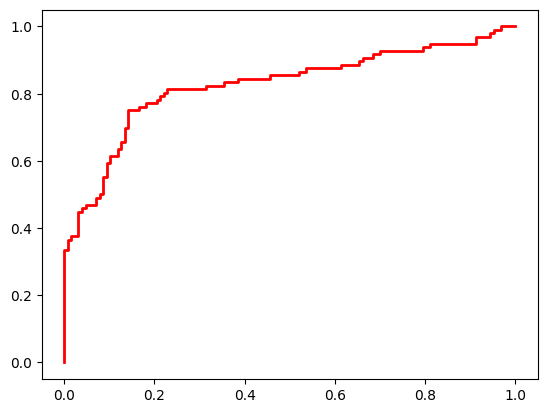

In [64]:
plt.plot(fpr,tpr,lw=2,color='red')

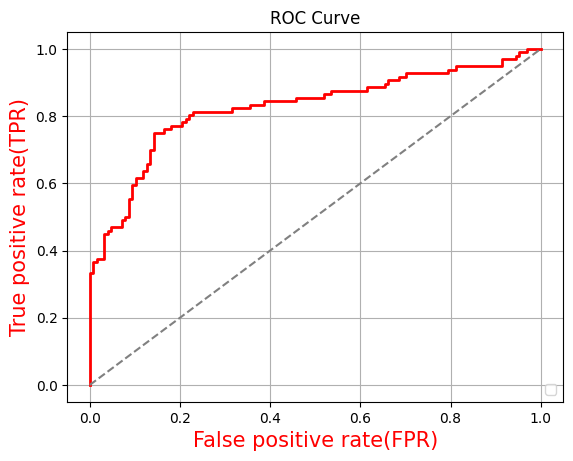

In [65]:
plt.plot(fpr,tpr,lw=2,color='red')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='grey') #to draw gret line
plt.title('ROC Curve')
plt.xlabel('False positive rate(FPR)',color='red',size=15)
plt.ylabel('True positive rate(TPR)',color='red',size=15)
plt.grid()

In [66]:
# DEPLOYMENT USING STREAMLIT
import pickle

In [67]:
with open("titanic_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

What is the difference between precision and recall?

Precision and Recall are evaluation metrics for classification models, especially in scenarios involving imbalanced datasets or critical decision-making (e.g., medical diagnoses, fraud detection). They focus on different aspects of a classifier's performance.Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.


Precision:
In the simplest terms, Precision is the ratio between the True Positives and all the Positives. Precision measures how many of the predicted positive instances are actually positive.High precision means fewer false positives.


Recall:
Recall (also known as sensitivity or true positive rate) measures how many of the actual positive instances are correctly identified.The recall is the measure of our model correctly identifying True Positives. High recall means fewer false negatives.


Q2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a resampling technique used in machine learning to evaluate the performance of a model by splitting the dataset into multiple subsets. It helps ensure that the model generalizes well to unseen data rather than just memorizing the training data.


Binary classification involves classifying instances into one of two categories (e.g., spam vs. non-spam, fraud vs. no fraud). Cross-validation is crucial for binary classification because:

Prevents Overfitting

Training on different subsets of the data ensures that the model doesn't just memorize the training set but generalizes well to new data.
Provides a More Reliable Performance Estimate

Instead of evaluating performance on a single train-test split, cross-validation uses multiple test sets, reducing variability in performance metrics (e.g., accuracy, precision, recall, F1-score, AUC-ROC).

